<a href="https://colab.research.google.com/github/zooodung/TA-Prediction/blob/sangyoun/Model_Train1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='/content/drive/MyDrive/camp/project1/open/'

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

#대구 데이터

In [4]:
daegu_data=pd.read_csv(path+'train.csv')
daegu_data.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [5]:
daegu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

<Axes: >

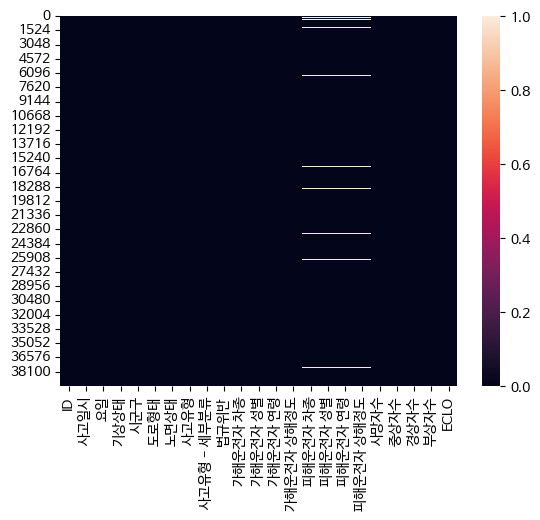

In [6]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

sns.heatmap(daegu_data.isnull())

결측치 제거

In [7]:
daegu=daegu_data.dropna(axis=0)
daegu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38618 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           38618 non-null  object
 1   사고일시         38618 non-null  object
 2   요일           38618 non-null  object
 3   기상상태         38618 non-null  object
 4   시군구          38618 non-null  object
 5   도로형태         38618 non-null  object
 6   노면상태         38618 non-null  object
 7   사고유형         38618 non-null  object
 8   사고유형 - 세부분류  38618 non-null  object
 9   법규위반         38618 non-null  object
 10  가해운전자 차종     38618 non-null  object
 11  가해운전자 성별     38618 non-null  object
 12  가해운전자 연령     38618 non-null  object
 13  가해운전자 상해정도   38618 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         38618 non-null  int64 
 19  중상자수         38618 non-nu

In [8]:
daegu['기상상태'].value_counts()

맑음    35328
비      2512
흐림      709
기타       55
안개        8
눈         6
Name: 기상상태, dtype: int64

In [40]:
daegu['ECLO'].sum()

183250

In [32]:
weather_counts=daegu.groupby('기상상태').sum()
weather_counts=weather_counts.drop('ECLO',axis=1)
print(weather_counts)


      사망자수  중상자수   경상자수  부상자수    ECLO
기상상태                                 
기타       1    22     50     6     276
눈        0     1      7     0      26
맑음     228  9097  38313  4393  167097
비       28   721   2736   289   12382
안개       0     1     13     0      44
흐림       5   217    737    79    3425


<ipython-input-32-074545b88c99>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_counts=daegu.groupby('기상상태').sum()


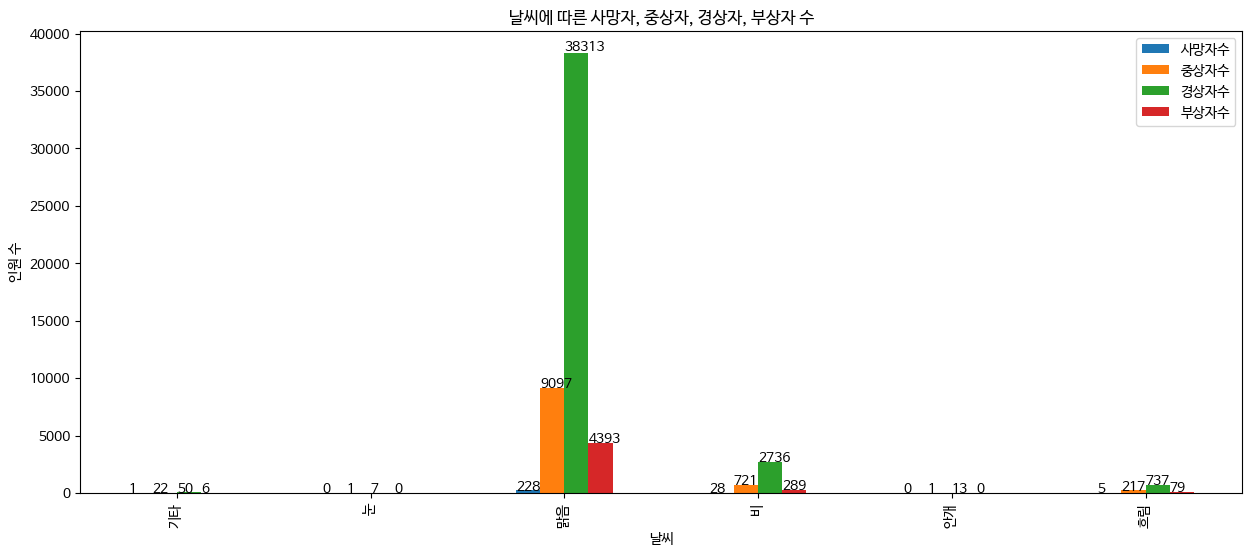

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))  # 전체 그래프의 크기 조절
weather_counts.plot(kind='bar',ax=ax)
plt.xlabel('날씨')
plt.ylabel('인원 수')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))
plt.title('날씨에 따른 사망자, 중상자, 경상자, 부상자 수')
plt.show()

시간대별

In [27]:
def get_time(date):
    return int(date.split()[-1])
time_df = daegu[['사고일시', '사망자수', '중상자수', '경상자수', '부상자수']].copy()
time_df['시간']=time_df['사고일시'].apply(get_time)
bins=[0,6,12,18,24]
labels=['0-5','6-11','12-17','18-23']
time_df['시간대']=pd.cut(time_df['시간'],bins=bins, labels=labels, right=False)
time_df.info()
time_counts=time_df.groupby('시간대').sum()
time_counts=time_counts.drop('시간',axis=1)
time_counts



<class 'pandas.core.frame.DataFrame'>
Int64Index: 38618 entries, 0 to 39608
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   사고일시    38618 non-null  object  
 1   사망자수    38618 non-null  int64   
 2   중상자수    38618 non-null  int64   
 3   경상자수    38618 non-null  int64   
 4   부상자수    38618 non-null  int64   
 5   시간      38618 non-null  int64   
 6   시간대     38618 non-null  category
dtypes: category(1), int64(5), object(1)
memory usage: 2.1+ MB


<ipython-input-27-510fc30bd49d>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_counts=time_df.groupby('시간대').sum()


,사망자수,중상자수,경상자수,부상자수
시간대,,,,
0-5,61,997,3286,384
6-11,64,2514,9559,999
12-17,63,3440,15323,1815
18-23,74,3108,13688,1569


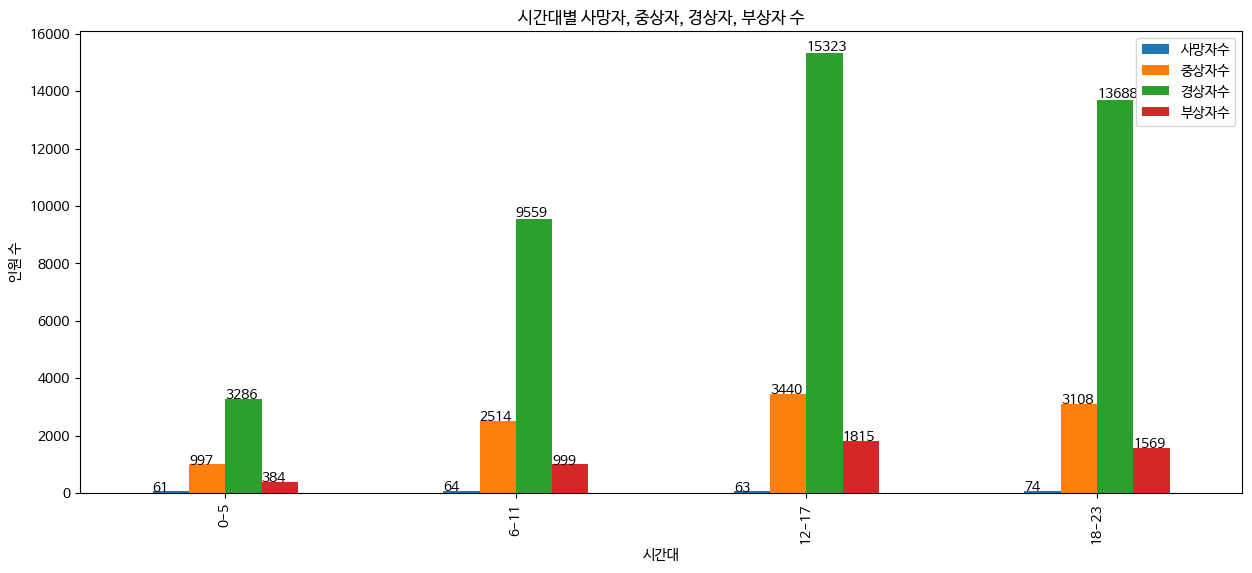

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))  # 전체 그래프의 크기 조절
time_counts.plot(kind='bar',ax=ax)
plt.xlabel('시간대')
plt.ylabel('인원 수')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))
plt.title('시간대별 사망자, 중상자, 경상자, 부상자 수')
plt.show()

노면상태

In [35]:
daegu['노면상태'].value_counts()

건조       35580
젖음/습기     2964
기타          50
서리/결빙       19
적설           3
침수           2
Name: 노면상태, dtype: int64

<ipython-input-44-db256b8f0e48>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  road_counts=daegu.groupby('노면상태').sum()


       사망자수  중상자수   경상자수  부상자수
노면상태                          
건조      232  9174  38575  4413
기타        2    17     33     5
서리/결빙     0     4     20     5
적설        0     0      3     0
젖음/습기    28   864   3223   343
침수        0     0      2     1


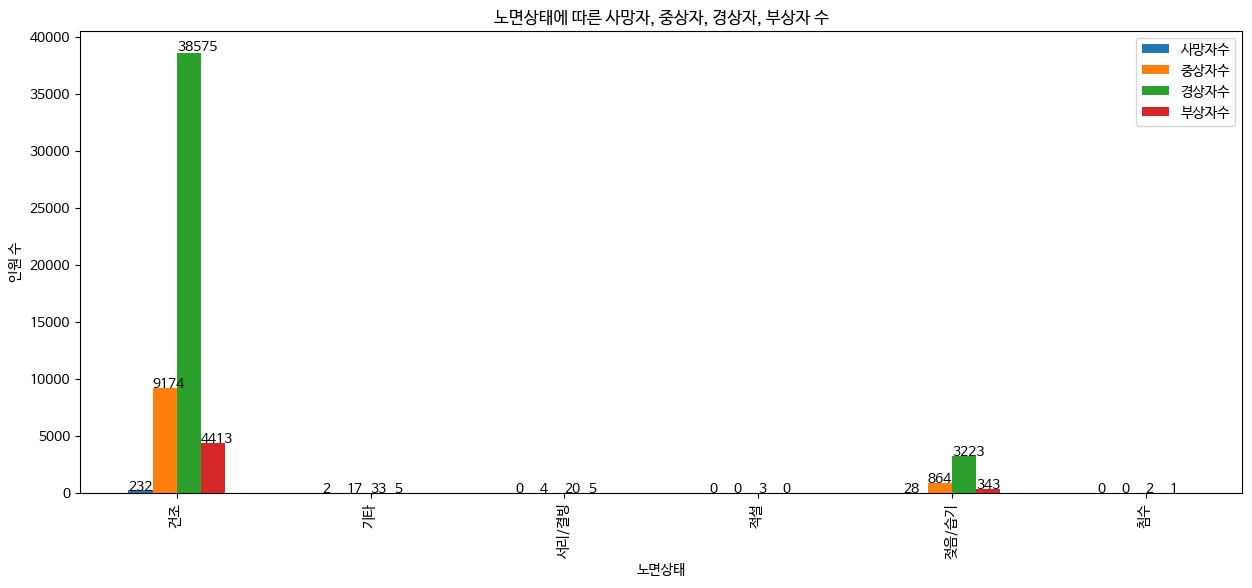

In [44]:
road_df = daegu[['노면상태', '사망자수', '중상자수', '경상자수', '부상자수']].copy()
road_counts=daegu.groupby('노면상태').sum()
road_counts=road_counts.drop('ECLO',axis=1)
print(road_counts)
fig, ax = plt.subplots(figsize=(15, 6))  # 전체 그래프의 크기 조절
road_counts.plot(kind='bar',ax=ax)
plt.xlabel('노면상태')
plt.ylabel('인원 수')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))
plt.title('노면상태에 따른 사망자, 중상자, 경상자, 부상자 수')
plt.show()

In [46]:
type_df=daegu[['사고유형', '사망자수', '중상자수', '경상자수', '부상자수']].copy()
type_df.value_counts()
# type_counts=daegu.groupby('사고유형').sum()

사고유형  사망자수  중상자수  경상자수  부상자수
차대차   0     0     1     0       14756
                  2     0        4646
            1     0     0        4116
차대사람  0     0     1     0        3513
            1     0     0        2313
                                ...  
                  5     0           1
차대차   0     1     4     3           1
                        2           1
                  3     3           1
      2     4     0     0           1
Length: 166, dtype: int64

In [14]:
ext_data=pd.read_csv(path+'external_open/countrywide_accident.csv')

In [15]:
ext_data.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,COUNTRYWIDE_ACCIDENT_000000,2019-01-01 00,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,40세,경상,0,0,1,0,3
1,COUNTRYWIDE_ACCIDENT_000001,2019-01-01 00,화요일,맑음,경기도 포천시 소흘읍,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,...,상해없음,이륜,남,20세,경상,0,0,1,0,3
2,COUNTRYWIDE_ACCIDENT_000002,2019-01-01 00,화요일,맑음,경기도 양주시 고암동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,17세,중상,0,1,0,0,5
3,COUNTRYWIDE_ACCIDENT_000003,2019-01-01 00,화요일,맑음,경기도 남양주시 다산동,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,10세,중상,0,2,0,0,10
4,COUNTRYWIDE_ACCIDENT_000004,2019-01-01 00,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,56세,경상,0,0,2,1,7


<Axes: >

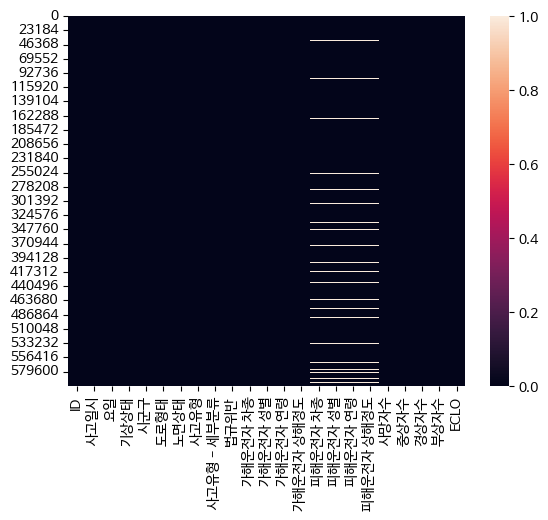

In [16]:
sns.heatmap(ext_data.isnull())